<a href="https://colab.research.google.com/github/JPP-J/deep-_learning_project/blob/main/DL_3_train_smoke_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# check gpu
!nvidia—smi

/bin/bash: line 1: nvidia—smi: command not found


# Train on custom dataset

In [13]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 25.4 MB/s eta 0:00:00


In [1]:
! pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
! pip install inference_sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.11.10
    Uninstalling aiohttp-3.11.10:
      Successfully uninstalled aiohttp-3.11.10


## Train smoke dataset

In [1]:
import os
HOME = "/content"
print(HOME)

/content


In [22]:
! ls {HOME}/datasets/smoke-1

roboflow.zip


In [6]:
! mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow

rf = Roboflow(api_key="di3objD7sYzfwqIlORaa")

# Initialize the Roboflow workspace and project
project = rf.workspace("jpp").project("smoke-uvylj-5otnb")

# Try downloading the dataset
try:
    dataset = project.version(1).download("coco")
    print("Download completed successfully.")
except Exception as e:
    print(f"Error occurred while downloading the dataset: {e}")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Download completed successfully.


In [9]:
!ls {HOME}/datasets/smoke-1

roboflow.zip  smoke.v1i.yolov8.zip


Note: download from roboflow if zip from api problem
[link](https://drive.google.com/file/d/1kQ7EKMYPc-fwC6bRswt2LpAnKDuOYHfI/view?usp=drive_link)

In [19]:
!unzip /content/datasets/smoke-1/smoke.v1i.yolov8.zip -d /content/datasets/smoke-1/

Archive:  /content/datasets/smoke-1/smoke.v1i.yolov8.zip
  inflating: /content/datasets/smoke-1/README.dataset.txt  
  inflating: /content/datasets/smoke-1/README.roboflow.txt  
  inflating: /content/datasets/smoke-1/data.yaml  
   creating: /content/datasets/smoke-1/test/
   creating: /content/datasets/smoke-1/test/images/
 extracting: /content/datasets/smoke-1/test/images/frame_000003-1_jpg.rf.724437079147124d95236986d049e675.jpg  
 extracting: /content/datasets/smoke-1/test/images/frame_000022-1_jpg.rf.afb62301924469e19fb6e3f7ca577e11.jpg  
 extracting: /content/datasets/smoke-1/test/images/frame_000025-5_jpg.rf.8ec943b0e9d6f87c6cfa097c5bfedd03.jpg  
 extracting: /content/datasets/smoke-1/test/images/frame_000055-2_jpg.rf.597cfe0f2f00bb34b649ab87d8ca5401.jpg  
 extracting: /content/datasets/smoke-1/test/images/frame_000060-5_jpg.rf.b337c423362576cfe2ba99301226e358.jpg  
 extracting: /content/datasets/smoke-1/test/images/frame_000080-2_jpg.rf.0a50b79357f3621789e3563fffc12915.jpg  
 e

In [20]:
!ls /content/datasets/smoke-1/

data.yaml	    README.roboflow.txt  smoke.v1i.yolov8.zip  train
README.dataset.txt  roboflow.zip	 test		       valid


In [21]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/smoke-1/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/smoke-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

In [22]:
!ls runs/detect/

train  train2


In [23]:
!ls runs/detect/train2

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1736162123.7824317263d2.5441.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch495.jpg	weights
P_curve.png					    train_batch496.jpg
PR_curve.png					    train_batch497.jpg


In [24]:
!ls runs/detect/train2/weights

best.pt  last.pt


## Additional information

### Confusion matrix

In [26]:
from PIL import Image

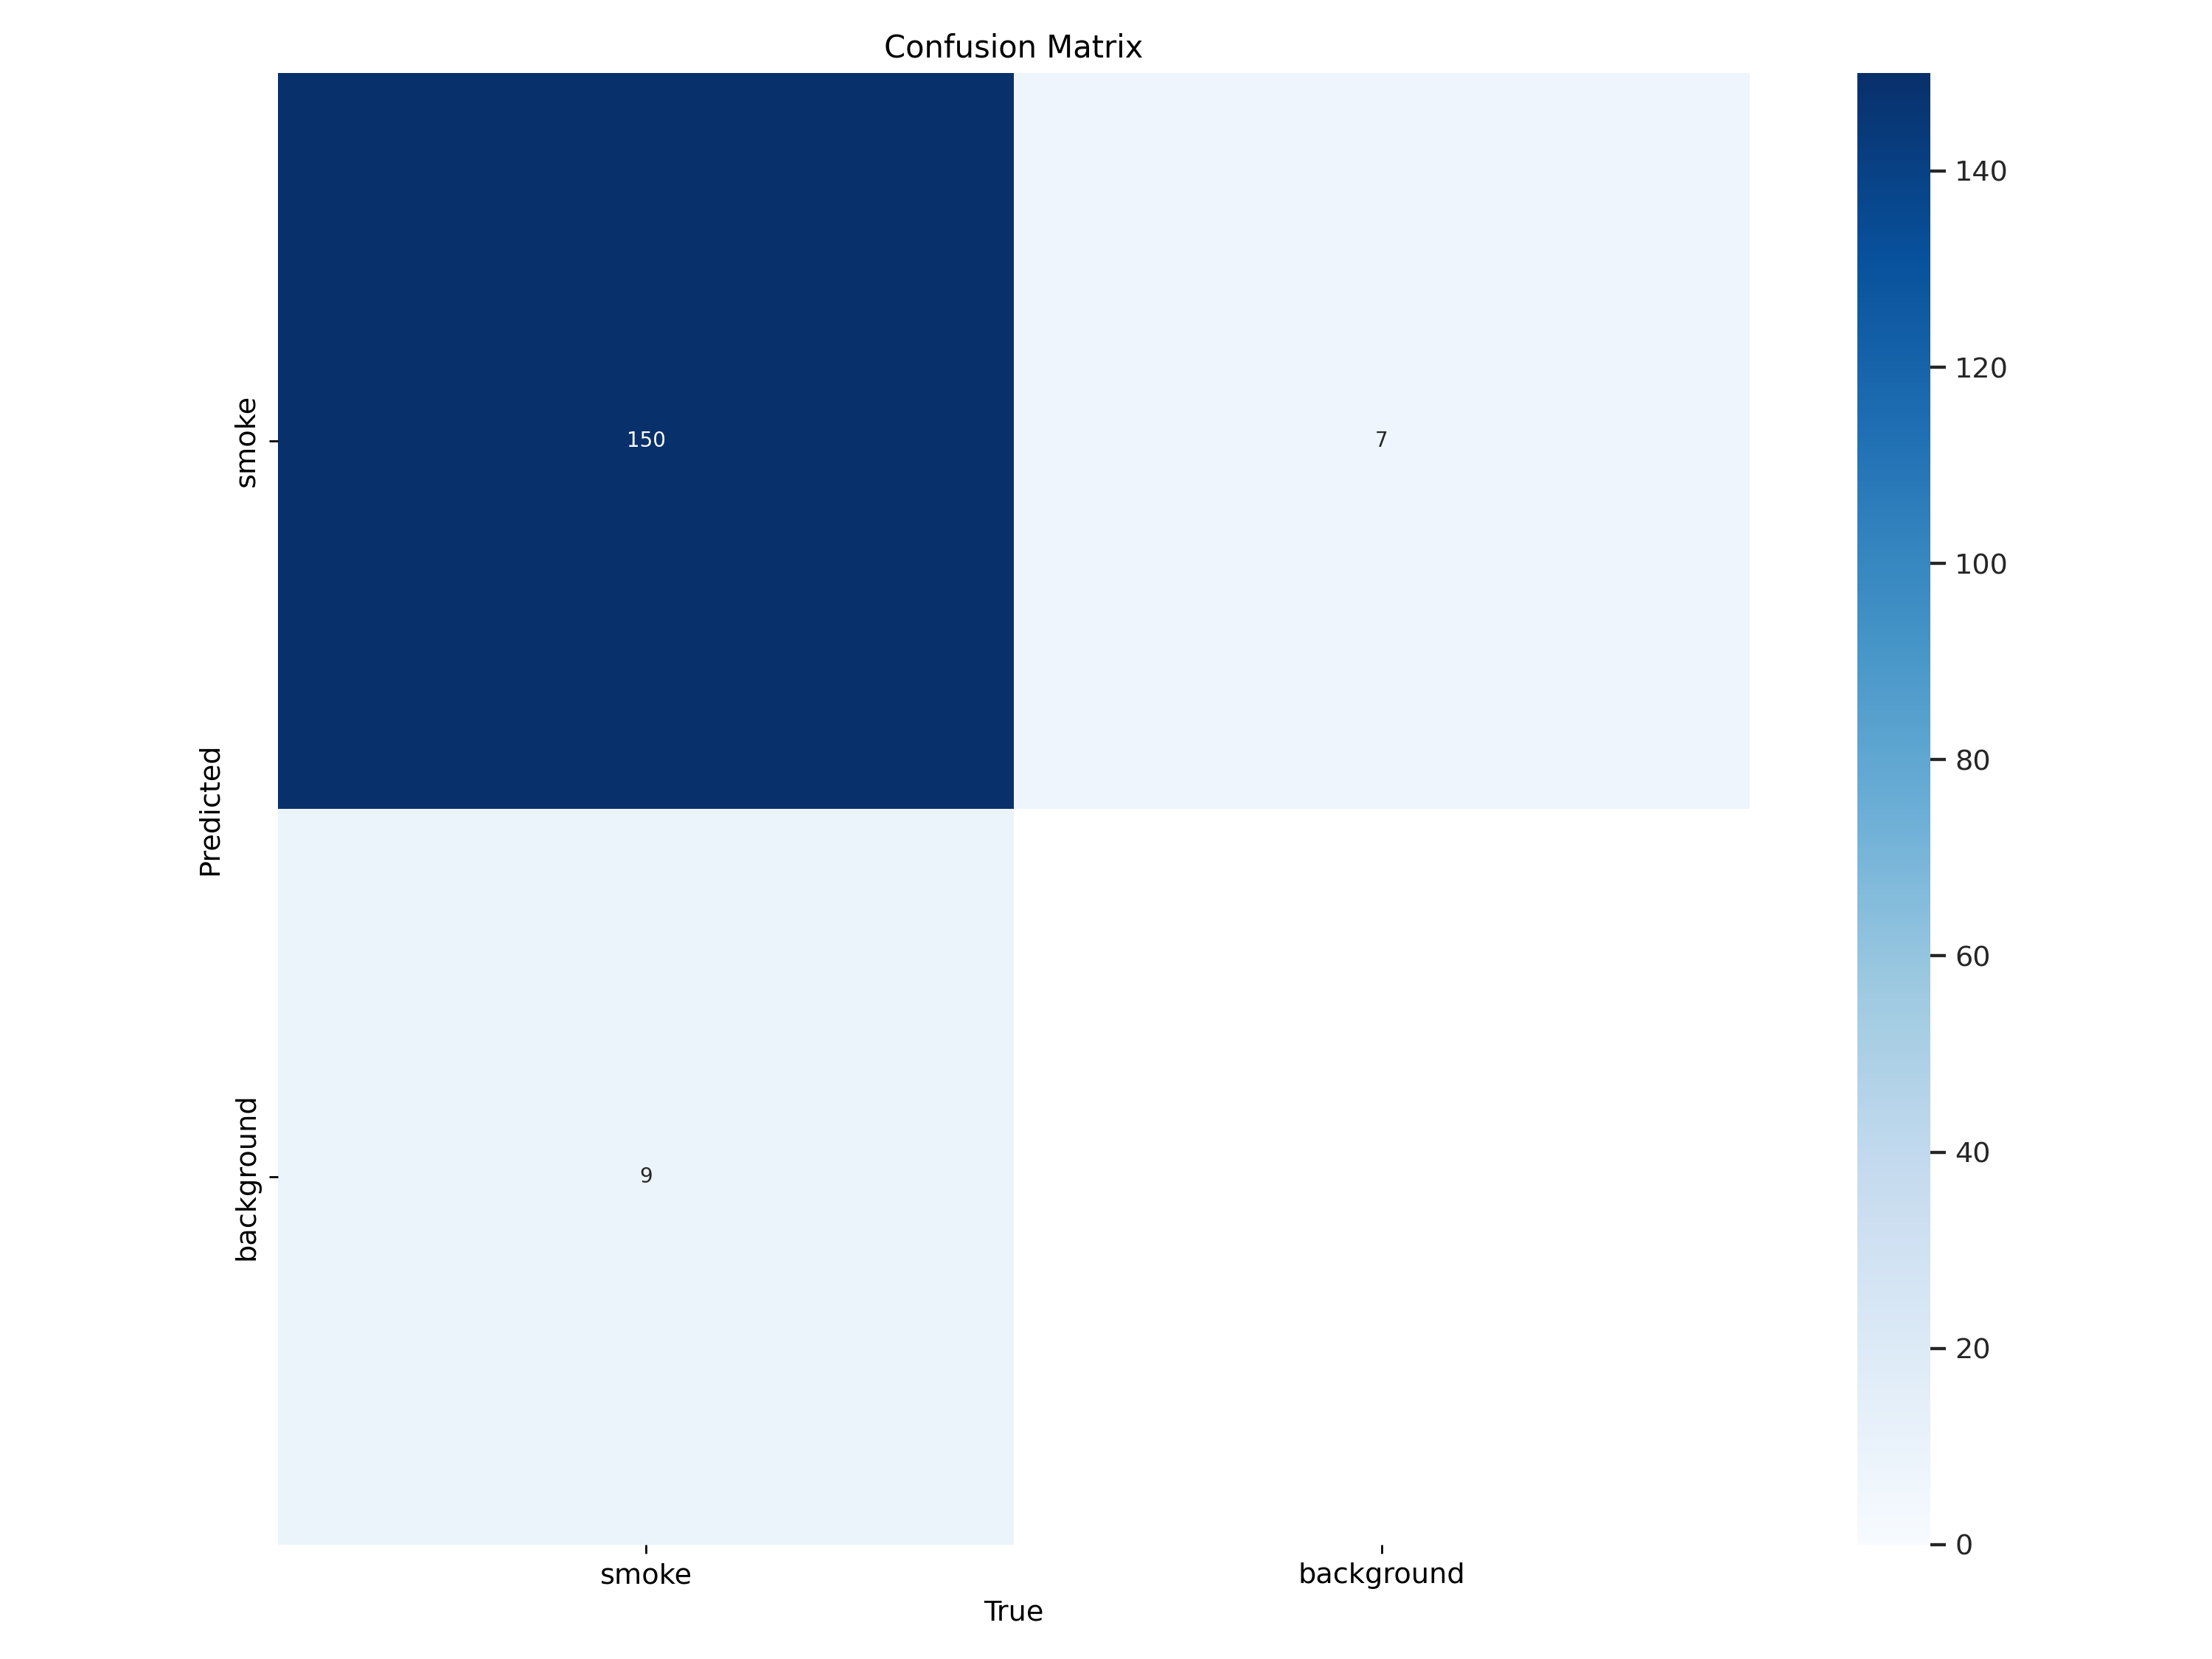

In [27]:
image = Image.open('/content/runs/detect/train2/confusion_matrix.png')
image

### Results training

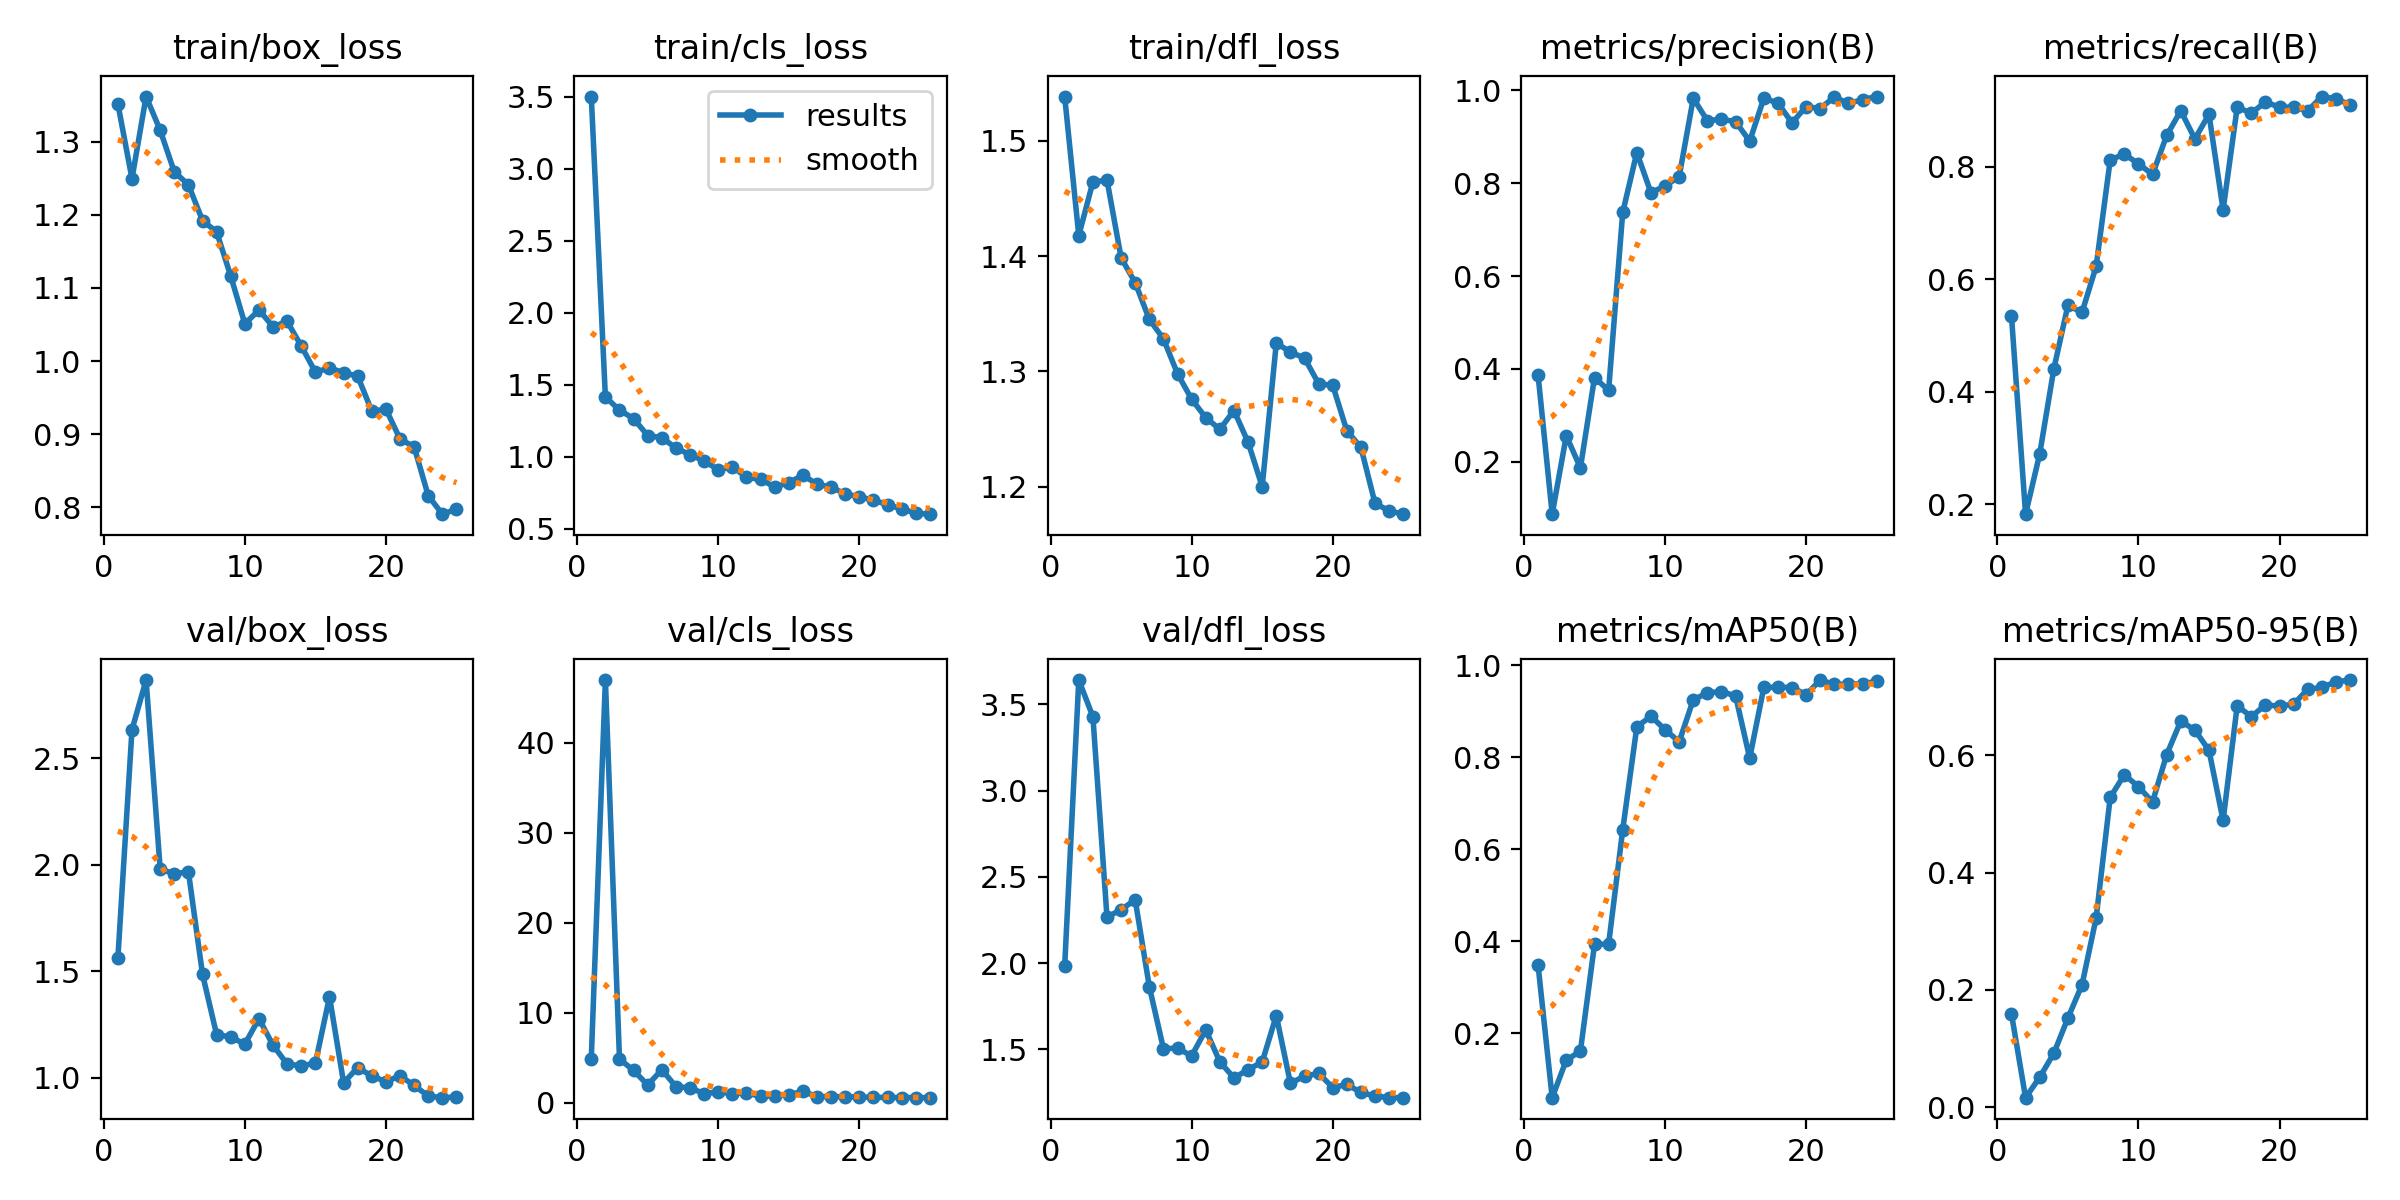

In [28]:
image = Image.open('/content/runs/detect/train2/results.png')
image

### Example validation while traning on batch1

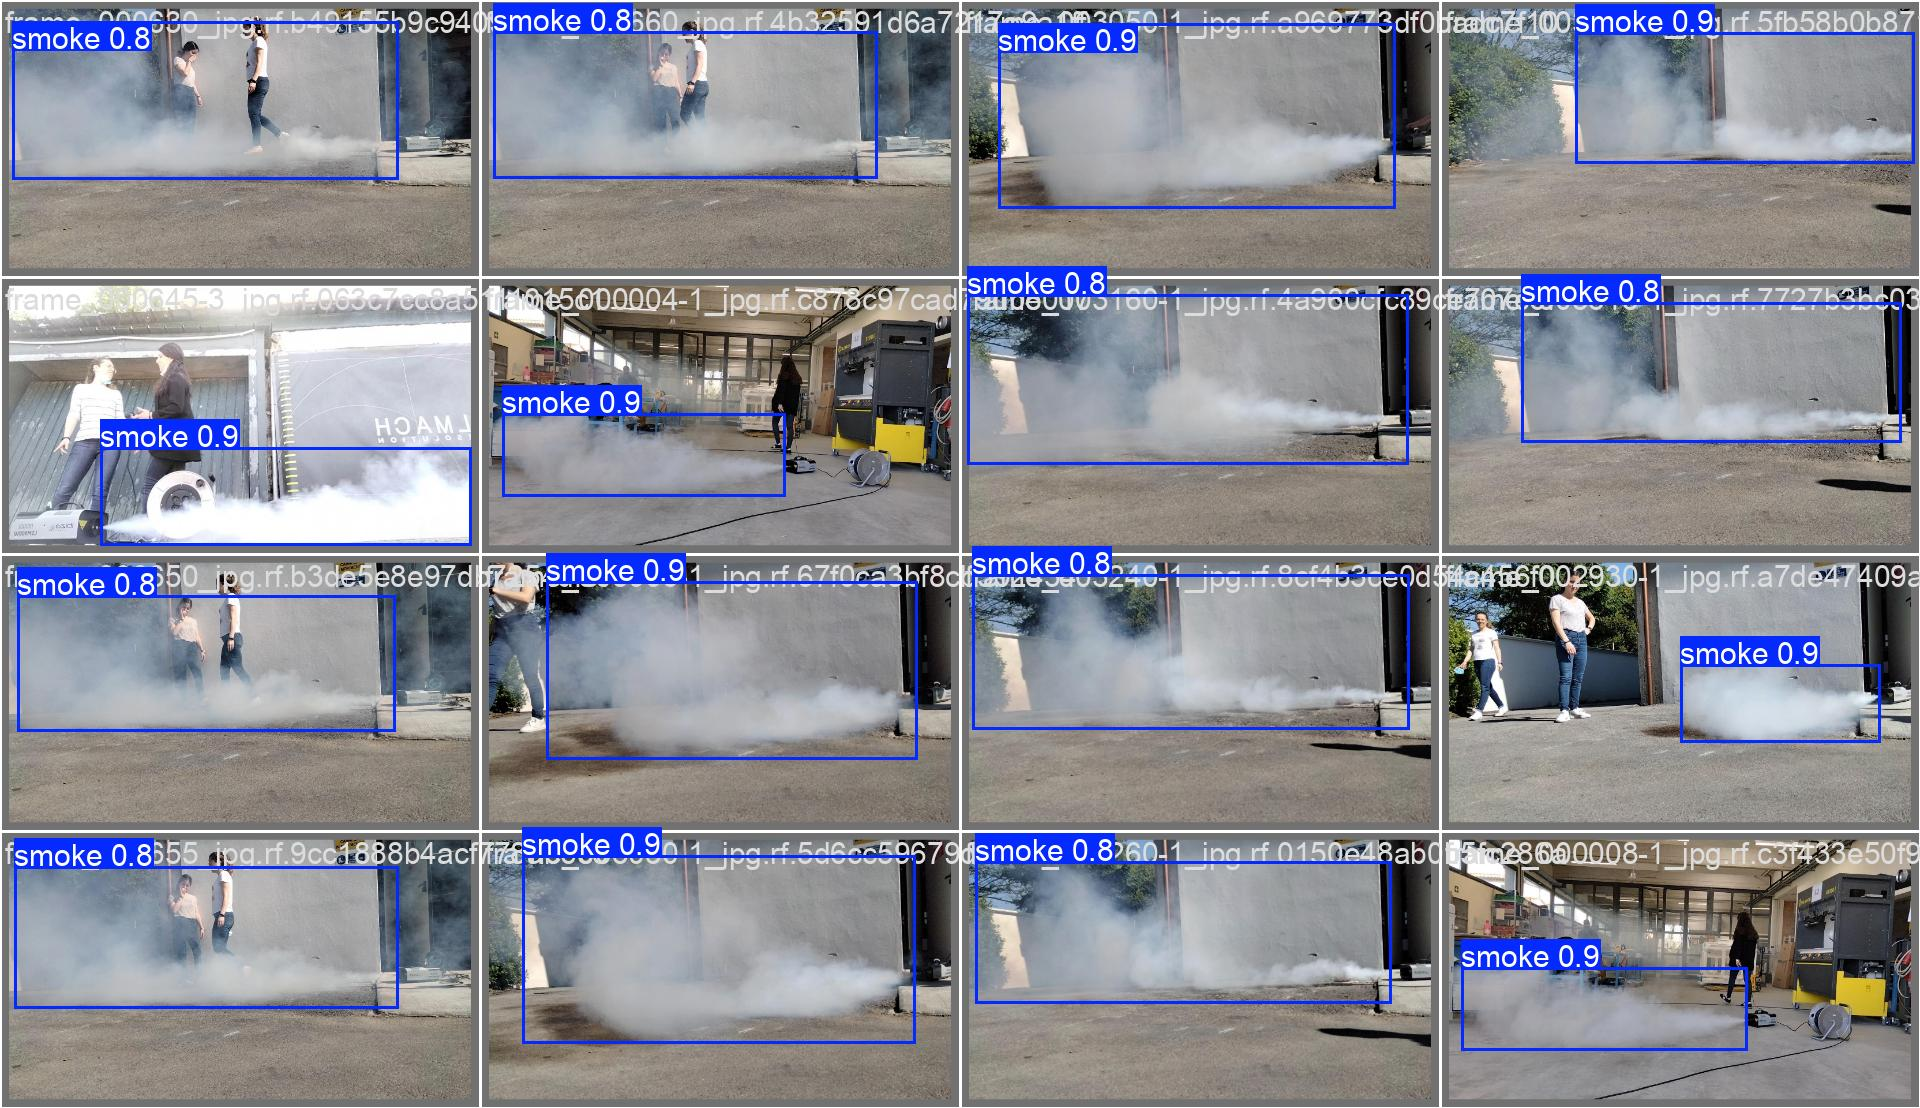

In [96]:
image = Image.open('/content/runs/detect/train2/val_batch1_pred.jpg')
image

### test on new data

In [84]:
from ultralytics import YOLO

# Load the trained model (replace with the path to your saved model)
model = YOLO("/content/runs/detect/train2/weights/best.pt")


In [97]:
import requests
from io import BytesIO

def get_pic(url):
  response = requests.get(url)
  image = Image.open(BytesIO(response.content))
  return image

#### Example1:

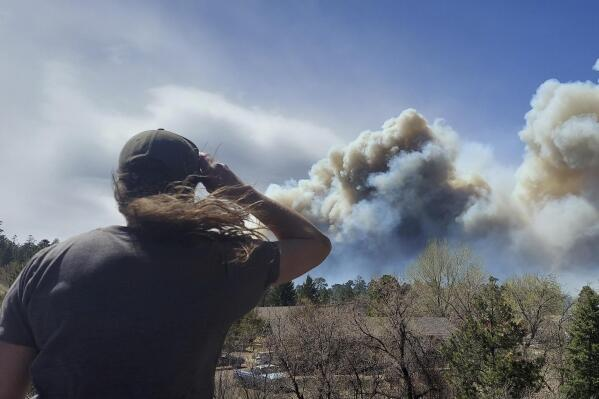

In [98]:
url = "https://dims.apnews.com/dims4/default/9300863/2147483647/strip/true/crop/1878x1252+0+0/resize/599x399!/quality/90/?url=https%3A%2F%2Fstorage.googleapis.com%2Fafs-prod%2Fmedia%2Fc806f7699441454f86daaf1bab357aa2%2F1878.jpeg"
image = get_pic(url)
image

In [107]:
results = model.predict(image, conf=0.3, save=True)
print(results)


0: 544x800 1 smoke, 17.8ms
Speed: 3.5ms preprocess, 17.8ms inference, 1.4ms postprocess per image at shape (1, 3, 544, 800)
Results saved to runs/detect/predict2
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'smoke'}
obb: None
orig_img: array([[[192, 176, 164],
        [192, 176, 164],
        [192, 176, 164],
        ...,
        [160,  94,  65],
        [160,  94,  65],
        [160,  94,  65]],

       [[192, 176, 164],
        [192, 176, 164],
        [192, 176, 164],
        ...,
        [160,  94,  65],
        [160,  94,  65],
        [160,  94,  65]],

       [[192, 176, 164],
        [192, 176, 164],
        [192, 176, 164],
        ...,
        [160,  94,  65],
        [160,  94,  65],
        [160,  94,  65]],

       ...,

       [[ 53,  48,  63],
        [ 53,  48,  63],
        [ 52,  47,  62],
        ...,
        [ 22,  27,  25],
        [ 33,  38,  36],
        [ 15,  

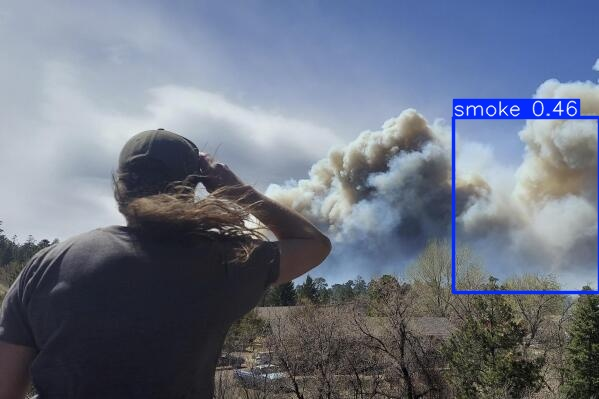

In [108]:
img_results = Image.open("/content/runs/detect/predict2/image0.jpg")
img_results

#### Example2:

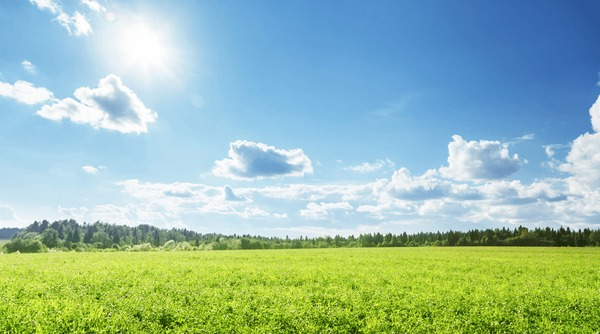

In [110]:
url2 = "https://www.shutterstock.com/image-photo/field-spring-grass-perfect-sky-600nw-1725016915.jpg"
image2 = get_pic(url2)
image2

In [111]:
results2 = model.predict(image2, conf=0.3)
results2[0].save("/content/runs/detect/predict2/image1.jpg")
print(results2)


0: 448x800 (no detections), 17.3ms
Speed: 3.7ms preprocess, 17.3ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 800)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'smoke'}
obb: None
orig_img: array([[[208, 163, 106],
        [209, 164, 107],
        [210, 165, 108],
        ...,
        [155,  87,  44],
        [155,  87,  44],
        [155,  87,  44]],

       [[210, 165, 108],
        [210, 165, 108],
        [211, 166, 109],
        ...,
        [155,  87,  44],
        [155,  87,  44],
        [155,  87,  44]],

       [[210, 166, 107],
        [210, 166, 107],
        [210, 166, 107],
        ...,
        [155,  87,  44],
        [155,  87,  44],
        [155,  87,  44]],

       ...,

       [[ 33, 166, 126],
        [  1, 127,  91],
        [  5, 118,  85],
        ...,
        [117, 227, 198],
        [ 64, 184, 153],
        [ 42, 168, 133]],

       [[  0,  85,

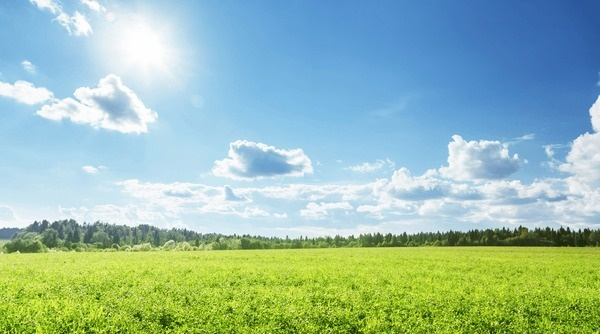

In [116]:
img_results2 = Image.open("/content/runs/detect/predict2/image1.jpg")
img_results2

size of model

In [43]:
!du -h yolov8s.pt

22M	yolov8s.pt


In [45]:
!du -h yolo11n.pt

5.4M	yolo11n.pt
